# **Trabajo Práctico N°1 : Reservas de Hotel**

**Checkpoint 1**

Grupo: N°06 - Pandatos

Integrantes: 
* Juan Sebastian Makkos 
* Valeria Brzoza 
* Rodolfo Valentin Albornoz Tomé.


Importamos las librerias correspondientes que vamos a utilizar

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A) Exploración Inicial

Cargamos el dataset de hotels_train


In [ ]:
ds_hotels_train = pd.read_csv('/content/drive/MyDrive/TP1_Orga/hotels_train.csv')
ds_trabajo = ds_hotels_train.copy()

Realizamos el análisis básico del dataset (Dimensiones, primeros y últimos 5 registros, etc)

In [ ]:
ds_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
ds_trabajo.shape

(61913, 32)

In [ ]:
ds_trabajo.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,NaN,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,NaN,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,NaN,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,9.0,NaN,0,Transient,143.29,0,0,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Obtengo los nombres de las columnas del dataset y los tipos de datos de las variables

In [ ]:
ds_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53771 entries, 0 to 61912
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           53771 non-null  object 
 1   lead_time                       53771 non-null  int64  
 2   arrival_date_year               53771 non-null  int64  
 3   arrival_date_month              53771 non-null  object 
 4   arrival_date_day_of_month       53771 non-null  int64  
 5   stays_in_weekend_nights         53771 non-null  int64  
 6   stays_in_week_nights            53771 non-null  int64  
 7   adults                          53771 non-null  int64  
 8   children                        53771 non-null  float64
 9   babies                          53771 non-null  int64  
 10  meal                            53771 non-null  object 
 11  country                         53771 non-null  object 
 12  is_repeated_guest               

### Variables cuantitativas y cualitativas 
Para encontrar las variables cuantitativas y cualitativas, observo los valores que pueden tomar las columnas

In [ ]:
ds_trabajo.apply(lambda col: ', '.join(map(str, col.unique())))

hotel                                                      City Hotel, Resort Hotel
lead_time                         49, 4, 25, 26, 104, 1, 112, 192, 257, 46, 349,...
arrival_date_year                                                  2016, 2015, 2017
arrival_date_month                September, October, December, March, November,...
arrival_date_week_number          37, 44, 42, 51, 12, 38, 46, 29, 23, 50, 11, 41...
arrival_date_day_of_month         5, 31, 13, 12, 19, 14, 4, 10, 15, 26, 20, 23, ...
stays_in_weekend_nights                    1, 0, 2, 3, 4, 6, 5, 10, 8, 9, 7, 16, 12
stays_in_week_nights              2, 1, 5, 9, 3, 6, 0, 4, 8, 7, 10, 19, 11, 15, ...
adults                                  1, 2, 3, 0, 4, 5, 40, 20, 6, 26, 10, 27, 55
children                                              0.0, 2.0, 1.0, 3.0, nan, 10.0
babies                                                                   0, 1, 2, 9
meal                                                      BB, HB, SC, Undefi

Del análisis de los valores posibles, se puede decir que las variables cuantitativas son:
*   lead_time (discreta)
*   stays_in_weekend_nights (discreta)
*   stays_in_week_nights (discreta)
*   adults (discreta)
*   children (discreta)
*   babies (discreta)
*   previous_cancellations (discreta)
*   previous_bookings_not_canceled (discreta)
*   booking_changes (discreta)
*   days_in_waiting_list (discreta)
*   adr (continua)
*   required_car_parking_spaces (discreta)
*   total_of_special_requests (discreta)

Y las variables cualitativas son:
*   hotel (nominal) 
*   arrival_date_year (nominal) 
*   arrival_date_month (nominal) 
*   arrival_date_week_number (nominal) 
*   arrival_date_day_of_month (nominal) 
*   meal (nominal) 
*   country (nominal) 
*   market_segment (nominal) 
*   distribution_channel (nominal) 
*   is_repeated_guest (nominal) 
*   reserved_room_type (nominal) 
*   assigned_room_type (nominal) 
*   deposit_type (nominal) 
*   agent (nominal) 
*   company (nominal) 
*   customer_type (nominal) 
*   id (nominal) 
*   is_canceled (nominal) 

Creo los datasets correspondientes con las variables cuantitativas por un lado y las cualitativas por otro

In [ ]:
ds_cuantitativas = ds_trabajo[["lead_time", "stays_in_weekend_nights","stays_in_week_nights", 
                     "adults", "children", "babies", "previous_cancellations", 
                     "previous_bookings_not_canceled", "booking_changes", 
                     "days_in_waiting_list", "adr", "required_car_parking_spaces",
                     "total_of_special_requests"]]

ds_cualitativas = ds_trabajo[["hotel", "arrival_date_year", "arrival_date_month", "arrival_date_week_number", 
                              "arrival_date_day_of_month", "meal", "country", "market_segment", 
                              "distribution_channel", "is_repeated_guest", "reserved_room_type", 
                              "assigned_room_type", "deposit_type", "agent", "company", 
                              "customer_type", "reservation_status_date", 
                              "id", "is_canceled"]]

Calculo las medidas de resumen del dataset con las variables cuantitativas

In [ ]:
ds_cuantitativas.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


Calculo, de las variables cualitativas, los posibles valores que pueden tomar



In [ ]:
for column in ds_cualitativas.columns:
  print("COLUMNA: " + column)
  print("VALORES POSIBLES: " + str(ds_cualitativas[column].value_counts().index.tolist()))
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

Y ahora calculo la frecuencia de cada uno de esos valores

In [ ]:
for column in ds_cualitativas.columns:
  print("COLUMNA: " + column)
  print(ds_cualitativas[column].value_counts())
  print("\n")

COLUMNA: hotel
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64


COLUMNA: arrival_date_year
2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64


COLUMNA: arrival_date_month
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64


COLUMNA: arrival_date_week_number
33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6

### Variables irrelevantes


Despues de revisar nuestras variables pudimos notar que:



*   El id es irrelevante para nuestro analisis, no es información util para la predicción de si una reseva va a ser cancelada o no. 

*   Consideramos que las variables referentes a los medios por los que se realizaron las reservas son irrelevantes para nuestro analisis. Estas variables serian Market_segment y distribution_channel

*   Las variables Agent, Company las consideramos irrelevantes para nuestro analisis por lo recien mencionado. Pero al ver que tiene un gran porcentaje de valores nulos, nos encargaremos de la eliminacion de sus valores nulos en la seccion de Datos faltantes

*  Dado que tenemos otras variables para determinar de forma más precisa para cuando era la reserva consideramos que no vamos a necesitar la variable Arrival_date_week_number.

*   En cuanto a las cuantitativas creemos que required_car_parking_spaces no va a afectar el analisis del dataset.

*   Por especificaciones y cambios en la consigna la variable reservation_status_date va a ser eliminada




In [ ]:
ds_trabajo.drop(["market_segment", "distribution_channel", "arrival_date_week_number", "required_car_parking_spaces", "reservation_status_date"], axis=1, inplace=True)
ds_cuantitativas.drop(["required_car_parking_spaces"], axis=1, inplace=True)
ds_cualitativas.drop(["market_segment", "distribution_channel", "arrival_date_week_number", "reservation_status_date"], axis=1, inplace=True)

<ipython-input-80-029de73b5422>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cuantitativas.drop(["required_car_parking_spaces"], axis=1, inplace=True)
<ipython-input-80-029de73b5422>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cualitativas.drop(["market_segment", "distribution_channel", "arrival_date_week_number", "reservation_status_date"], axis=1, inplace=True)


Revisamos que la eliminación de las variables haya sido exitosa.

In [ ]:
ds_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,5,1,2,1,0.0,0,...,0,No Deposit,9.0,NaN,0,Transient,115.5,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,31,0,1,2,0.0,0,...,0,No Deposit,NaN,NaN,0,Transient,42.0,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,13,0,1,2,2.0,0,...,0,No Deposit,9.0,NaN,0,Transient,229.0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,12,2,5,2,0.0,0,...,0,Non Refund,154.0,NaN,0,Transient,75.0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,19,2,5,2,0.0,0,...,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,1,28c75445-c603-413a-babf-ad377018b592,0


### Análisis gráfico de las distribuciones 


Realizamos unos graficos de las variables cuantitativas que vemos más importantes


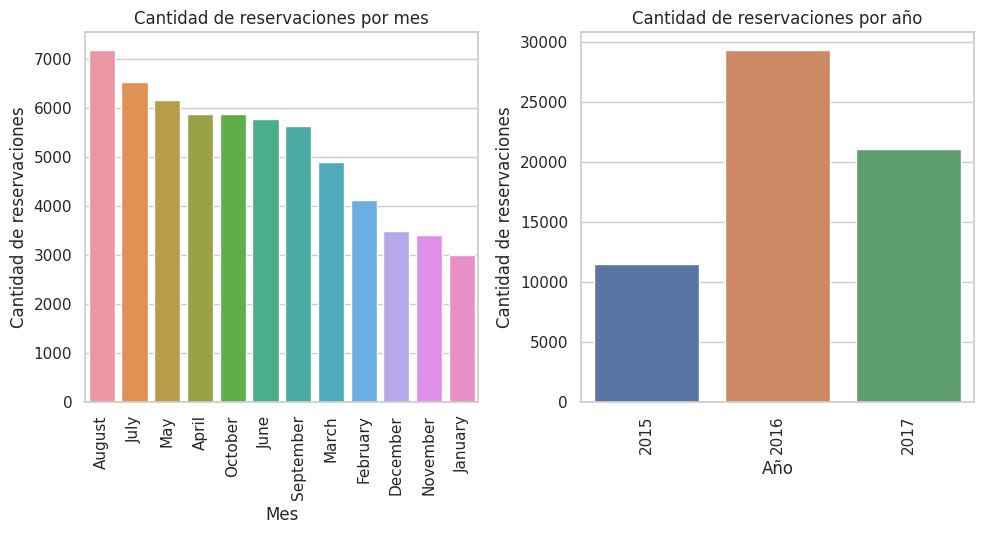

In [ ]:
from ipywidgets import Color
fig, ax = plt.subplots(1,2)

years=ds_cualitativas['arrival_date_year'].value_counts().head(12)
sns.barplot(x=years.index, y=years.values)
plt.title("Cantidad de reservaciones por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de reservaciones")
plt.sca(ax[0])
plt.xticks(rotation=90)

month=ds_cualitativas['arrival_date_month'].value_counts().head(12)
sns.barplot(x=month.index, y=month.values)
plt.title("Cantidad de reservaciones por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de reservaciones")
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True

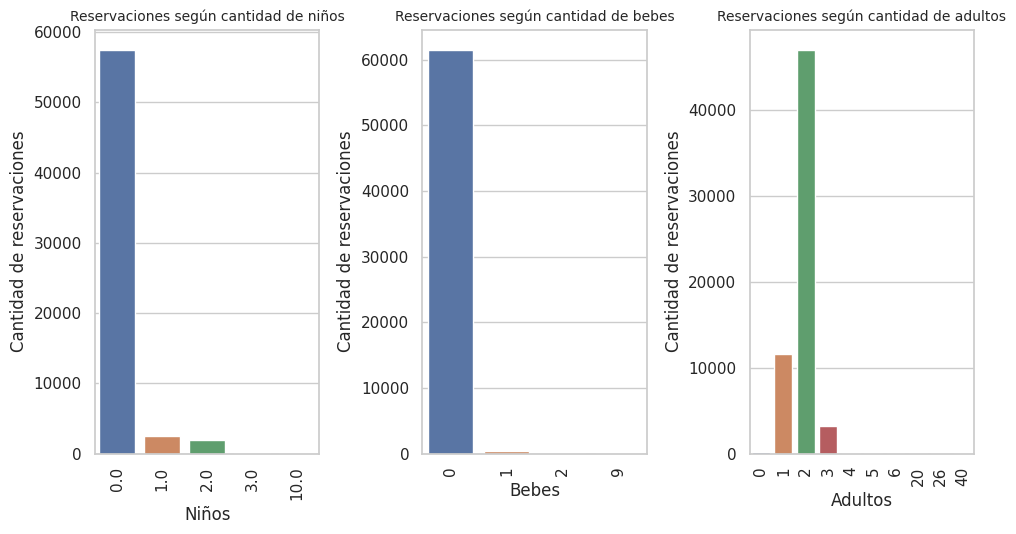

In [ ]:
fig, ax = plt.subplots(1,3)

adultos = ds_cuantitativas['adults'].value_counts().head(10)
sns.barplot(x=adultos.index, y=adultos.values).set(xlabel='Adultos', ylabel='Cantidad de reservaciones')
plt.title("Reservaciones según cantidad de adultos", fontsize = 10)
plt.sca(ax[0])
plt.xticks(rotation=90)
  
children = ds_cuantitativas['children'].value_counts().head(10)
sns.barplot(x=children.index, y=children.values).set(xlabel='Niños', ylabel='Cantidad de reservaciones')
plt.title("Reservaciones según cantidad de niños", fontsize = 10)
plt.sca(ax[1])
plt.xticks(rotation=90)

babies = ds_cuantitativas['babies'].value_counts()
sns.barplot(x=babies.index, y=babies.values).set(xlabel='Bebes', ylabel='Cantidad de reservaciones')
plt.title("Reservaciones según cantidad de bebes", fontsize = 10)
plt.sca(ax[2])
plt.xticks(rotation=90)

plt.show()

### Analisis de las correlaciones existentes entre las variables.

Heatmap de correlacion entre todas las variables

<Axes: >

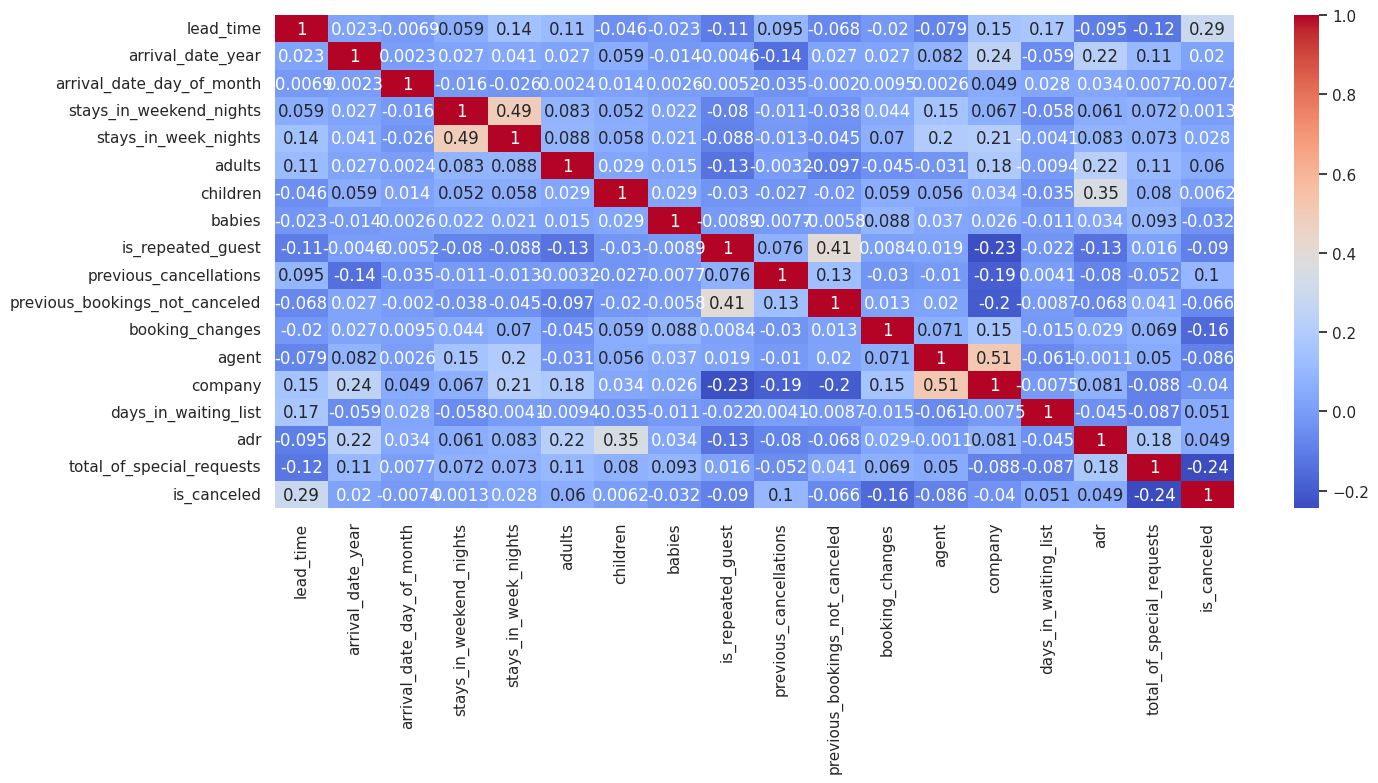

In [ ]:
matriz_corr=ds_trabajo.corr()
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Del heatmap podemos sacar:


*   stays_in_week_nights & stays_in_weekend_nights: **Correlacion positiva**
*   children & babbies: **Correlacion positiva**
*   previous_booking_not_canceled & is_repeated_guest: **Correlacion positiva**

En estos casos, se puede ver una correlacion. La cantidad de noches de semana siempre va a estar asociada a la cantidad de noches del fin de semana, cuantas más noches se pasa en la semana, mas seran en el fin de semana. Tambien en el caso de los niños y bebes. Se ve que si llevan, sera lo minimo, pero no llevarian más bebes que niños y lo mismo al reves.

Sin embargo, visualizando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos. Por ejemplo, en el gráfico de correlación entre bebés y adultos, hay un caso en el que hay 8 bebes. Estos aspectos se analizarán en la sección de valores atipicos.



[Text(0.5, 0, 'adultos'), Text(0, 0.5, 'Niños')]

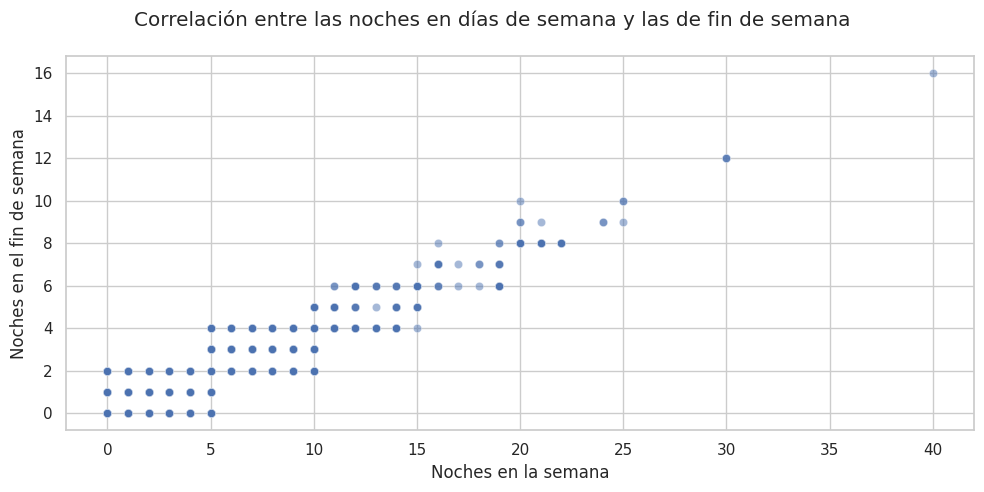

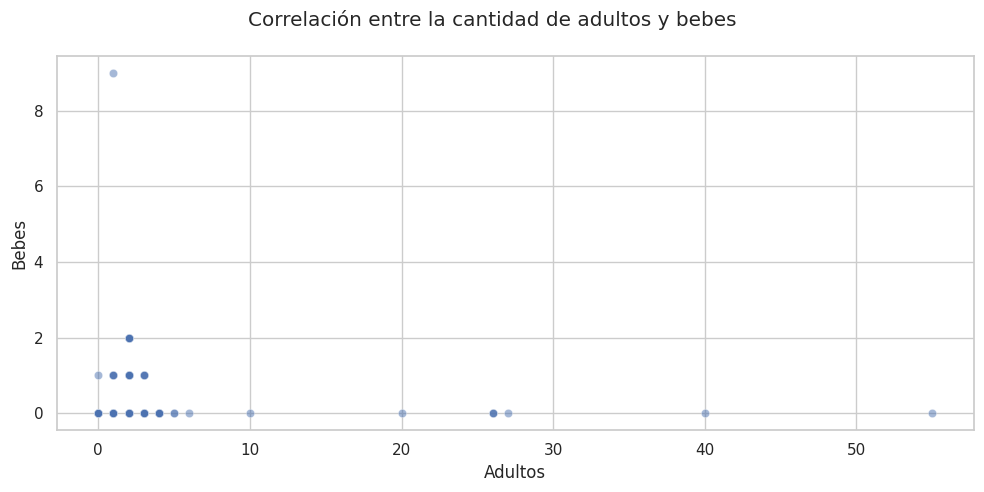

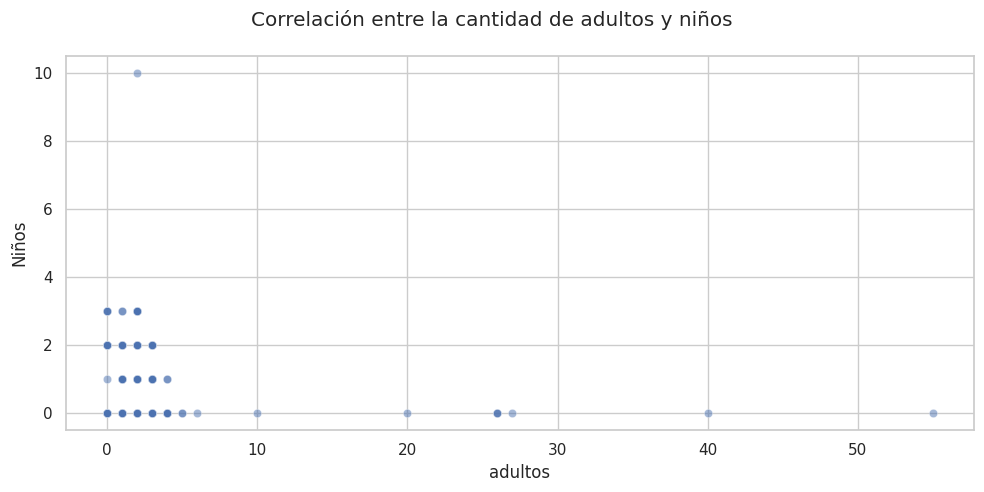

In [ ]:
correlacion1 = ds_cuantitativas[['stays_in_week_nights', 'stays_in_weekend_nights']]
correlacion2 = ds_cuantitativas[['babies', 'adults']]
correlacion3 = ds_cuantitativas[['children', 'adults']]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

fig.suptitle('Correlación entre las noches en días de semana y las de fin de semana')
sns.scatterplot(x='stays_in_week_nights', y='stays_in_weekend_nights',data=correlacion1, alpha=0.5, ax = ax).set(xlabel='Noches en la semana', ylabel='Noches en el fin de semana')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre la cantidad de adultos y bebes')
sns.scatterplot(x='adults', y='babies',data=correlacion2, alpha=0.5, ax = ax).set(xlabel='Adultos', ylabel='Bebes')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre la cantidad de adultos y niños')
sns.scatterplot(x='adults', y='children',data=correlacion3, alpha=0.5, ax = ax).set(xlabel='adultos', ylabel='Niños')

### Analisis variables con TARGET 

Del heatmap se puede sacar que las variables relevantes para is_canceled son:
*   lead_time
*   booking changes
*   total_of_special_requests
*   previous_bookings_not_canceled
*   Previous cancellations



[Text(0.5, 0, 'Vino antes al hotel y no cancelo'), Text(0, 0.5, 'is_canceled')]

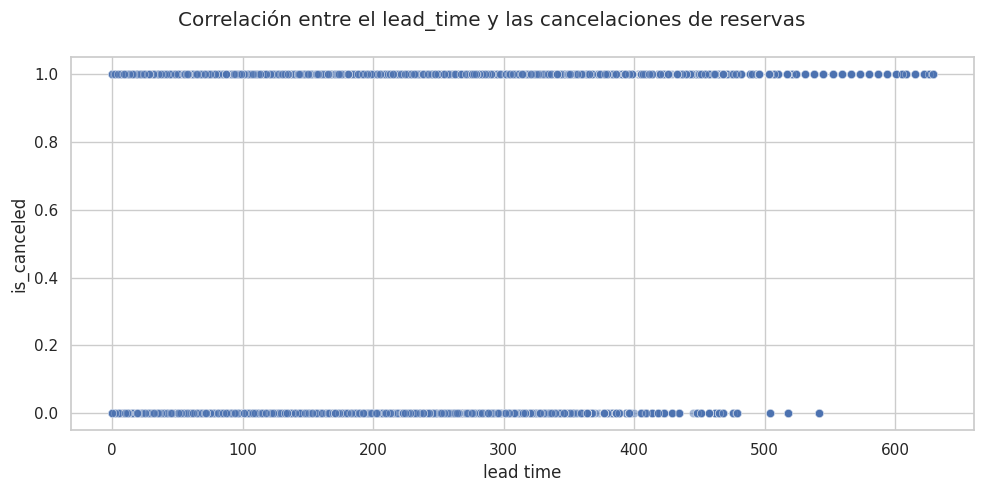

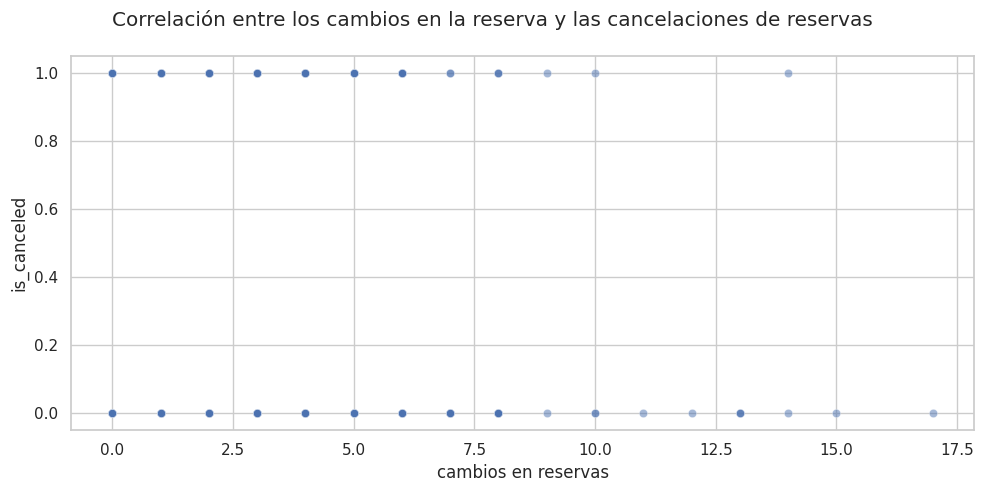

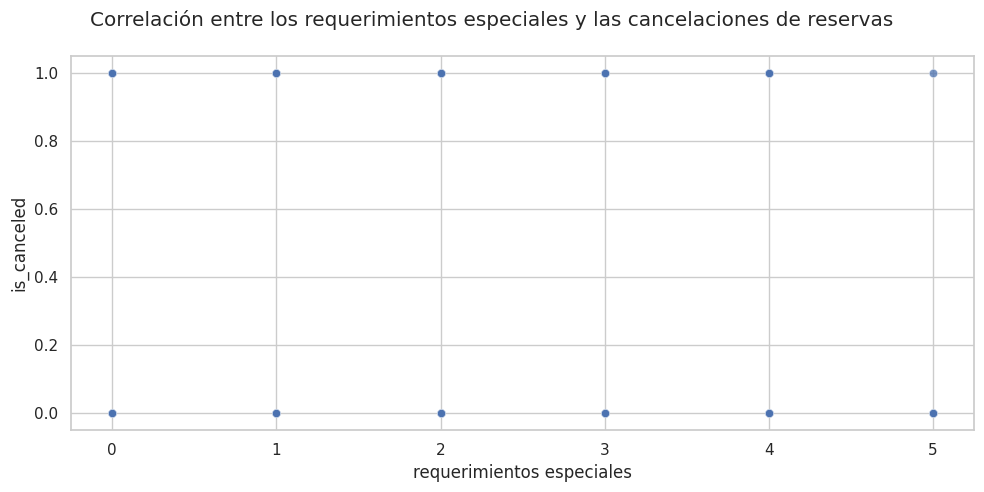

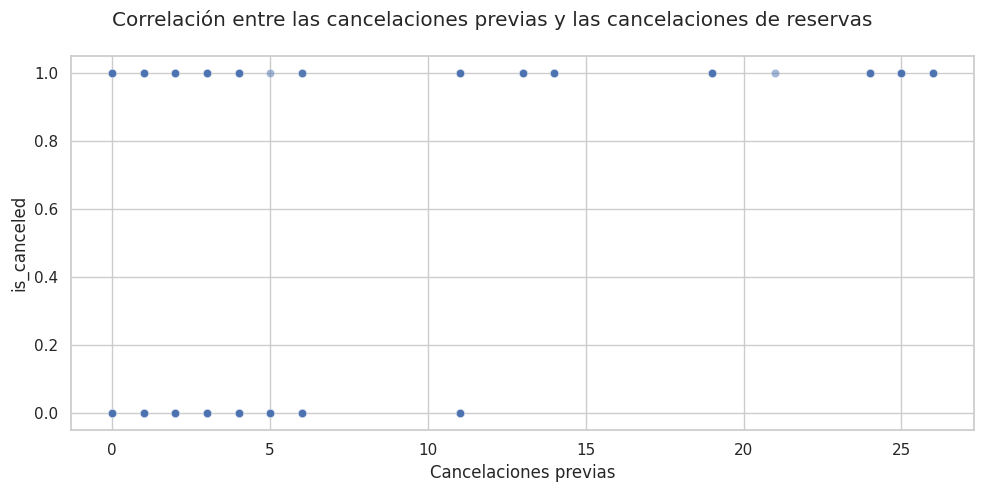

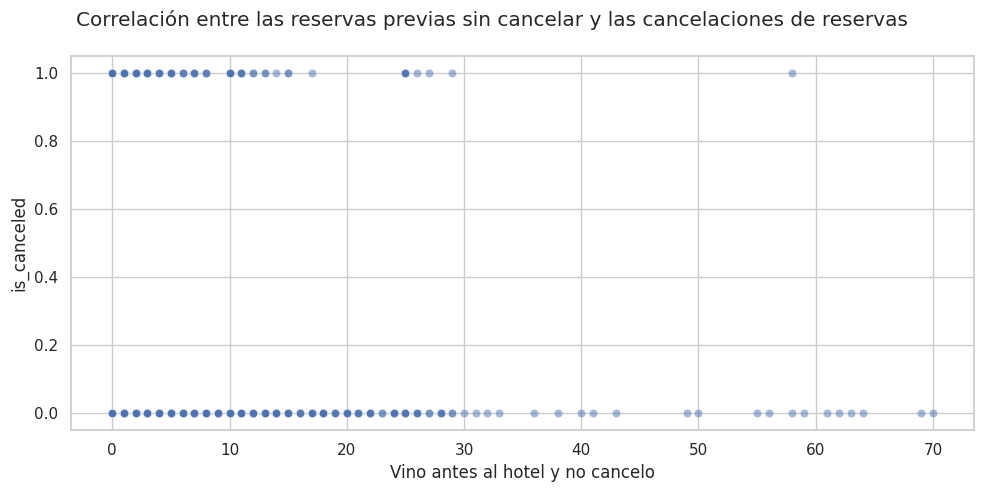

In [ ]:
correlacion = ds_trabajo[['lead_time', 'booking_changes',
                           'total_of_special_requests', 'previous_cancellations',
                          'previous_bookings_not_canceled', 'is_canceled']]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre el lead_time y las cancelaciones de reservas')
sns.scatterplot(x='lead_time', y='is_canceled',data=correlacion, alpha=0.5, ax = ax).set(xlabel='lead time', ylabel='is_canceled')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre los cambios en la reserva y las cancelaciones de reservas')
sns.scatterplot(x='booking_changes', y='is_canceled',data=correlacion, alpha=0.5, ax = ax).set(xlabel='cambios en reservas', ylabel='is_canceled')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre los requerimientos especiales y las cancelaciones de reservas')
sns.scatterplot(x='total_of_special_requests', y='is_canceled',data=correlacion, alpha=0.5, ax = ax).set(xlabel='requerimientos especiales', ylabel='is_canceled')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre las cancelaciones previas y las cancelaciones de reservas')
sns.scatterplot(x='previous_cancellations', y='is_canceled',data=correlacion, alpha=0.5, ax = ax).set(xlabel='Cancelaciones previas', ylabel='is_canceled')

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Correlación entre las reservas previas sin cancelar y las cancelaciones de reservas')
sns.scatterplot(x='previous_bookings_not_canceled', y='is_canceled',data=correlacion, alpha=0.5, ax = ax).set(xlabel='Vino antes al hotel y no cancelo', ylabel='is_canceled')

De los gráficos anteriores se puede sacar:

* is_canceled & lead_time: Las reservas con más anticipación (450 días aproximadamente) tienden a ser más canceladas. 
*   is_canceled & booking_changes: Las reservas con más cambios tienden a no ser canceladas.
*   is_canceled & total_of_special_requests: No encontramos una correlación.
*   previous_cancellations & is_canceled: Una vez que una persona cancelo 11 veces previas va a seguir cancelando las nuevas reservas que realice
*   previous_bookings_not_canceled & is_canceled: La gente tiende a no cancelar reservas despues de haber reservado en el pasado más de 20 veces sin haber cancelado







# B) Visualización de los datos

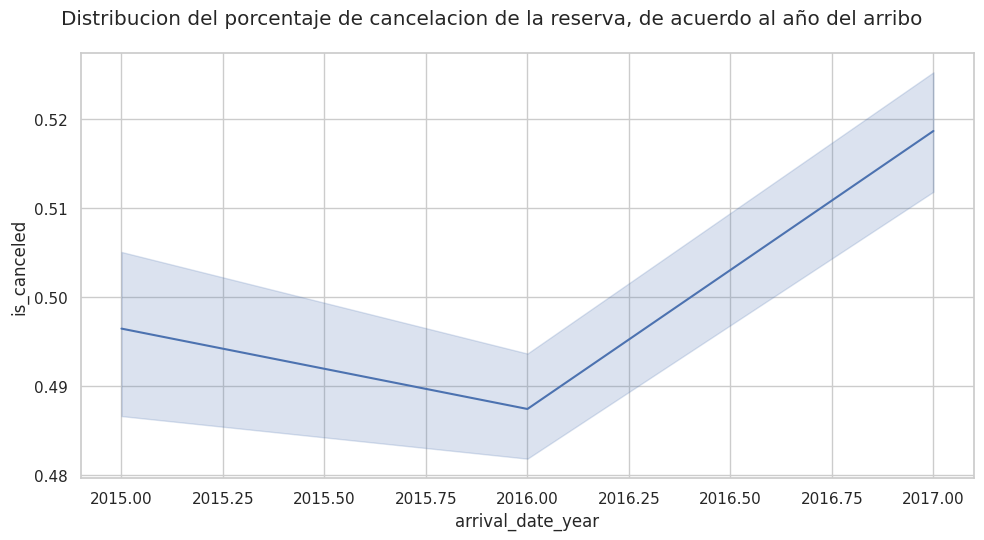

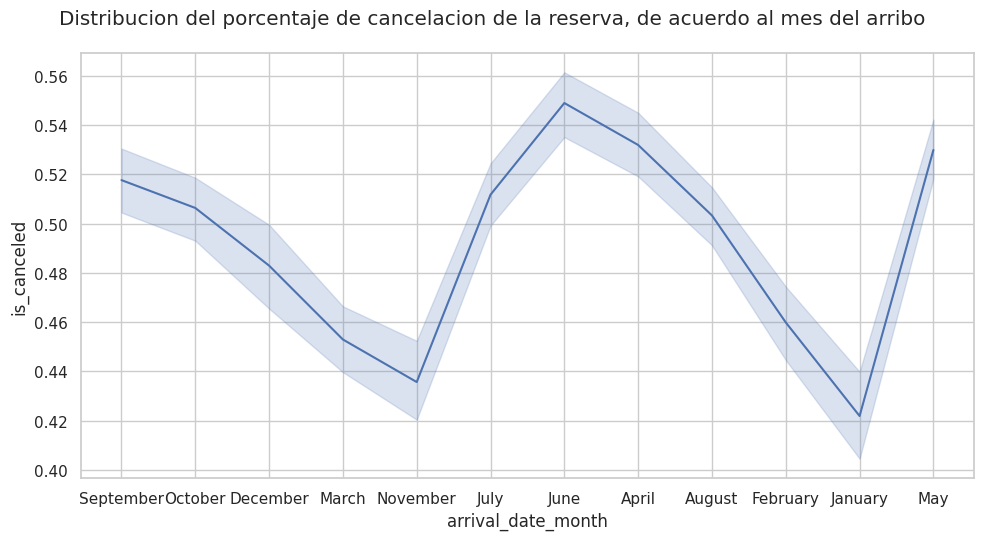

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
fig.suptitle('Distribucion del porcentaje de cancelacion de la reserva, de acuerdo al año del arribo')

fig = sns.lineplot(x=ds_trabajo['arrival_date_year'], y=ds_trabajo['is_canceled'])
plt.sca(ax)

sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
fig.suptitle('Distribucion del porcentaje de cancelacion de la reserva, de acuerdo al mes del arribo')

fig = sns.lineplot(x=ds_trabajo['arrival_date_month'], y=ds_trabajo['is_canceled'])
plt.sca(ax)


A partir de estos graficos, podemos analizar el porcentaje de cancelacion de las reservas, segun mes y año

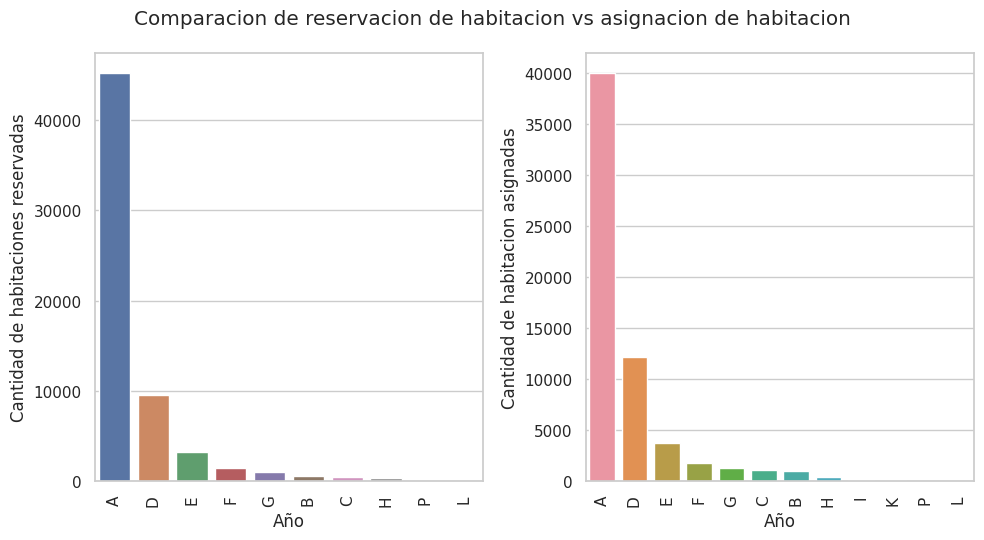

In [ ]:
fig, ax = plt.subplots(1,2)

fig.suptitle('Comparacion de reservacion de habitacion vs asignacion de habitacion')

years=ds_cualitativas['assigned_room_type'].value_counts().head(12)
sns.barplot(x=years.index, y=years.values)
plt.xlabel("Año")
plt.ylabel("Cantidad de habitacion asignadas")
plt.sca(ax[0])
plt.xticks(rotation=90)

years=ds_cualitativas['reserved_room_type'].value_counts().head(12)
sns.barplot(x=years.index, y=years.values)
plt.xlabel("Año")
plt.ylabel("Cantidad de habitaciones reservadas")
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

A partir de la comparacion de ambos graficos, podemos ver la diferencia entre las habitaciones reservadas vs habitaciones asignadas

# C) Datos faltantes

###Observaciones generales



Realizo una copia del data set para analizarlo posteriormente con la imputacion realizada

In [ ]:
ds_pre_imputacion = ds_trabajo.copy()

Calculamos la cantidad de valores nulos por columna

In [ ]:
ds_trabajo.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0
adr                                   0
total_of_special_requests             0


Ahora calculamos el porcentaje de datos nulos por columna.

In [ ]:
nullable_percentages = (ds_trabajo.isnull().sum() / ds_trabajo.shape[0]) * 100
print(nullable_percentages)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             12.743689
company                           94.908985
days_in_waiting_list               0.000000
customer_type                   

Graficamos el porcentaje de valores nulos de cada columna

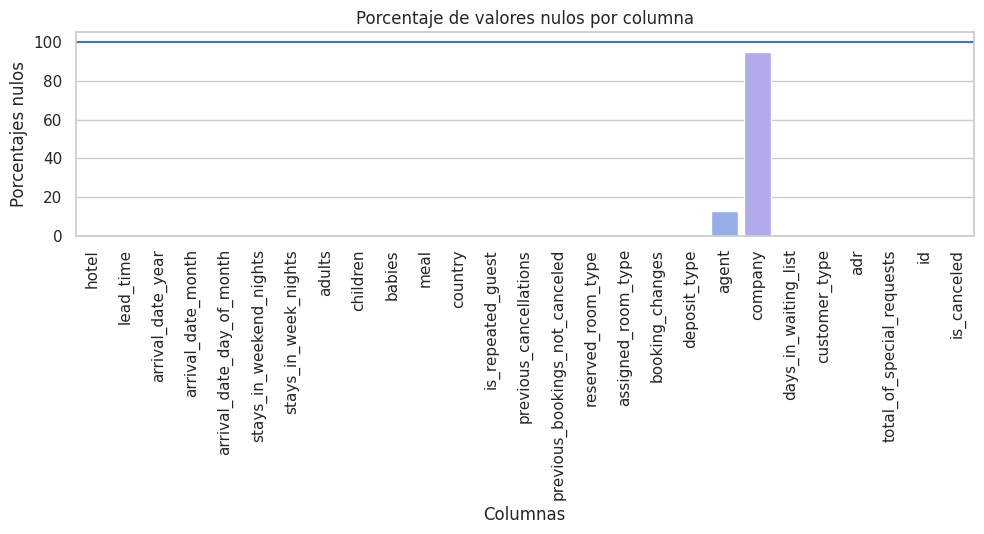

In [ ]:
graph = sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
graph.axhline(100)
plt.title("Porcentaje de valores nulos por columna")
plt.xticks(rotation=90)
plt.ylabel("Porcentajes nulos")
plt.xlabel("Columnas")
plt.tight_layout()

Podemos observar que la columna company tiene un porcentaje de nulos de 94.908985% siendo de todas las columnas la que mayor cantidad de nulos posee. Por esto consideramos que no es relevante para nuestro analisis y procederemos a eliminarla.

In [ ]:
ds_trabajo.drop(['company'], axis=1, inplace = True)

Corroboramos que se haya eliminado correctamente

In [ ]:
ds_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,5,1,2,1,0.0,0,...,D,0,No Deposit,9.0,0,Transient,115.5,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,31,0,1,2,0.0,0,...,A,0,No Deposit,NaN,0,Transient,42.0,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,13,0,1,2,2.0,0,...,F,0,No Deposit,9.0,0,Transient,229.0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,12,2,5,2,0.0,0,...,A,0,Non Refund,154.0,0,Transient,75.0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,19,2,5,2,0.0,0,...,A,0,No Deposit,20.0,0,Transient-Party,75.0,1,28c75445-c603-413a-babf-ad377018b592,0


###Tratamiento de datos faltantes

Recordamos la cantidad de valores que tiene el data set original

In [ ]:
print("Filas del data set: {}".format(ds_trabajo.shape[0]))

Filas del data set: 61913


Vamos a ver cuantos valores nulls tienen cada columna, para luego realizar la imputacion y eliminar esos valores

In [ ]:
ds_trabajo.isnull().sum()

hotel                                0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             4
babies                               0
meal                                 0
country                            221
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             7890
days_in_waiting_list                 0
customer_type                        0
adr                                  0
total_of_special_requests            0
id                                   0
is_canceled              

Procedemos a eliminar las filas que tienen valor nulo en children (dado que al ser relativamente pocas observaciones no se pierde una cantidad considerable de información)

In [ ]:
ds_trabajo = ds_trabajo.dropna(subset=['children'])

In [ ]:
ds_trabajo.isnull().sum()

hotel                                0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                            221
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             7888
days_in_waiting_list                 0
customer_type                        0
adr                                  0
total_of_special_requests            0
id                                   0
is_canceled              

In [ ]:
ds_trabajo.shape

(61909, 26)

Eliminamos los valores nulls en la variable Country

In [ ]:
ds_trabajo = ds_trabajo.dropna(subset=['country'])

In [ ]:
ds_trabajo.isnull().sum()

hotel                                0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             7744
days_in_waiting_list                 0
customer_type                        0
adr                                  0
total_of_special_requests            0
id                                   0
is_canceled              

In [ ]:
ds_trabajo.shape

(61688, 26)

Eliminamos por ultimo, los valores null de la variable Agent

In [ ]:
ds_trabajo = ds_trabajo.dropna(subset=['agent'])

In [ ]:
ds_trabajo.shape

(53944, 26)

Como podemos ver, arrancamos con 27 columnas, y terminamos con 26.
Y ademas si hacemos la cuenta 61913 = 53944 (Restante) + 7744 (Valores null de Agent) + 221 (Valores null de country) + 4 (Valores null de children), es correcta la eliminacion de todos los valores null.

###Analizamos las distribuciones de las variables antes y despues de su imputacion

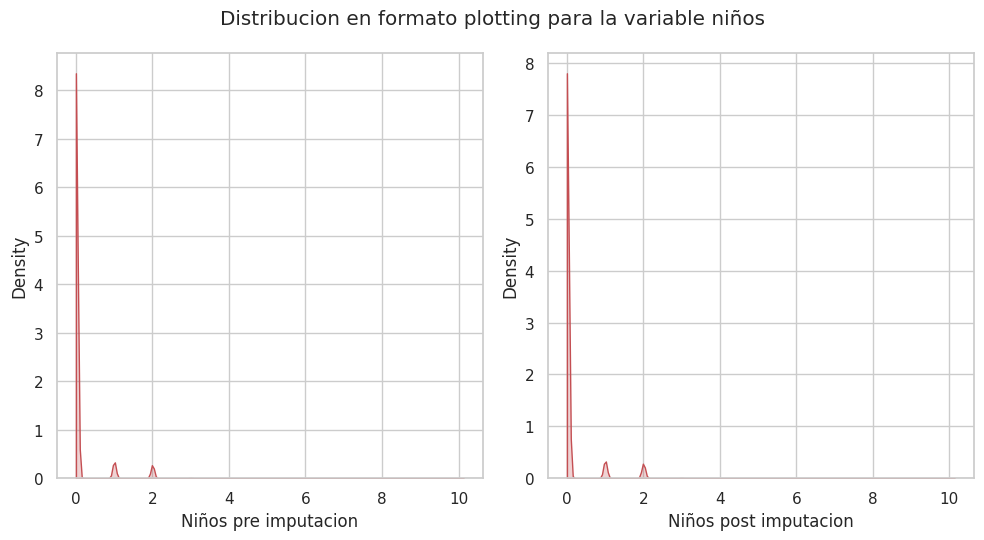

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribucion en formato plotting para la variable niños')

fig = sns.kdeplot(ds_trabajo['children'], shade=True, color="r", clip=(0,20)).set(xlabel='Niños post imputacion')
plt.sca(ax[0])

fig = sns.kdeplot(ds_pre_imputacion['children'], shade=True, color="r", clip=(0,20)).set(xlabel='Niños pre imputacion')
plt.sca(ax[1])

plt.show()

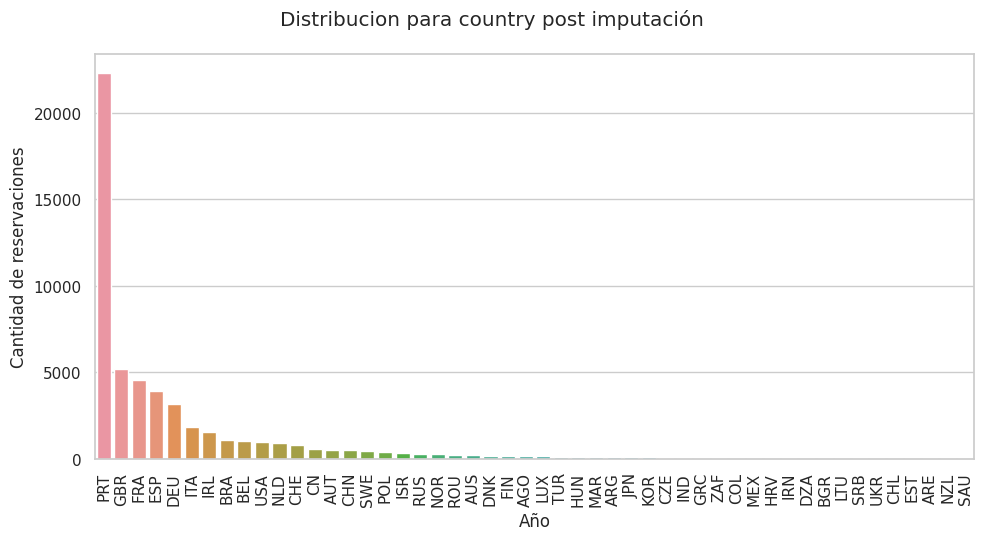

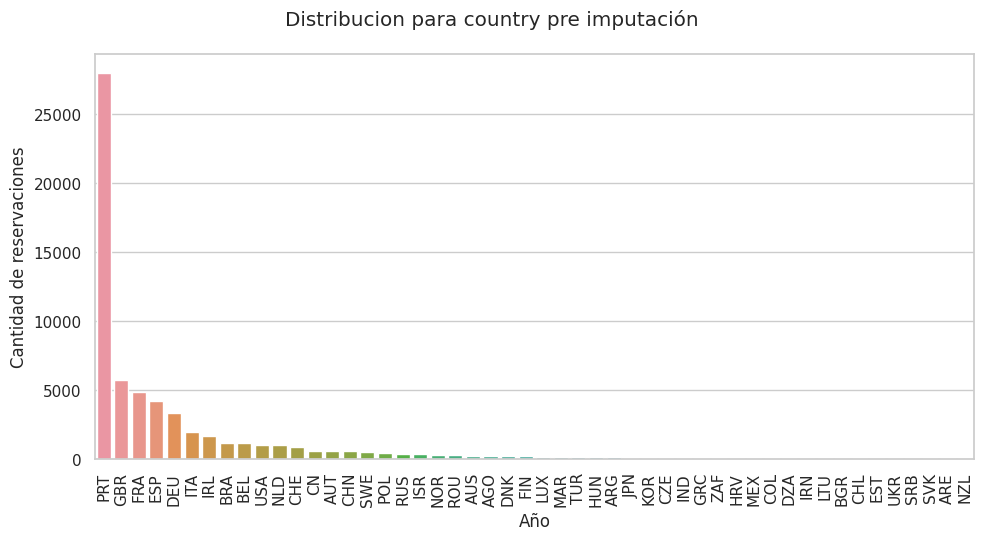

In [57]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
fig.suptitle('Distribucion para country post imputación')

rooms=ds_trabajo['country'].value_counts().head(50)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel("Año")
plt.ylabel("Cantidad de reservaciones")
plt.sca(ax)
plt.xticks(rotation=90)

sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
fig.suptitle('Distribucion para country pre imputación')
rooms=ds_pre_imputacion['country'].value_counts().head(50)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel("Año")
plt.ylabel("Cantidad de reservaciones")
plt.sca(ax)
plt.xticks(rotation=90)

plt.show()

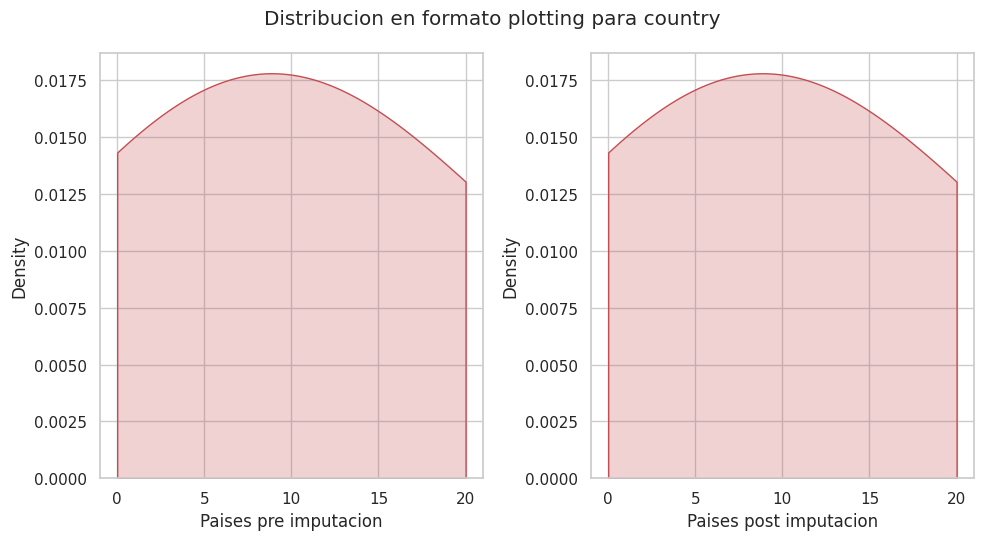

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribucion en formato plotting para country')

fig = sns.kdeplot(ds_trabajo['agent'], shade=True, color="r", clip=(0,20)).set(xlabel='Paises post imputacion')
plt.sca(ax[0])

fig = sns.kdeplot(ds_pre_imputacion['agent'], shade=True, color="r", clip=(0,20)).set(xlabel='Paises pre imputacion')
plt.sca(ax[1])

plt.show()

Como conclusión, se podría decir que en el gráfico de plotting para children y el gráfico de plotting para country, no hay mucha diferencia en la distribucion después de quitar los datos nulos.

# D) Valores atípicos

In [ ]:
ds_trabajo.apply(lambda col: ', '.join(map(str, col.unique())))

hotel                                                      City Hotel, Resort Hotel
lead_time                         49, 25, 26, 104, 112, 192, 257, 4, 46, 349, 3,...
arrival_date_year                                                  2016, 2017, 2015
arrival_date_month                September, October, December, March, November,...
arrival_date_day_of_month         5, 13, 12, 19, 4, 10, 15, 14, 26, 20, 23, 18, ...
stays_in_weekend_nights                    1, 0, 2, 4, 3, 6, 5, 10, 8, 7, 9, 16, 12
stays_in_week_nights              2, 1, 5, 9, 3, 0, 4, 8, 6, 7, 10, 19, 15, 17, ...
adults                                                            1, 2, 3, 0, 4, 26
children                                                   0.0, 2.0, 1.0, 3.0, 10.0
babies                                                                   0, 1, 2, 9
meal                                                      BB, HB, SC, Undefined, FB
country                           USA, CHE, PRT, FRA, GBR, DEU, ESP, ROU, SW

A partir de los valores que pueden tomar las variables, podemos ver que puede haber valores atípicos en las columnas:
*  adults
*  children
*  babies
*  stays_in_weekend_nights
*  stays_in_week_nights

Detectamos que en algunos registros, la columna adultos tomaban valor 0. Entonces, buscamos los registros que tengan 0 adultos.

In [ ]:
ds_trabajo[(ds_trabajo["adults"] == 0)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
96,City Hotel,23,2016,May,21,2,4,0,2.0,0,...,B,0,No Deposit,9.0,0,Transient,128.49,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,July,7,0,1,0,2.0,0,...,B,0,No Deposit,9.0,0,Transient,91.85,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
326,City Hotel,53,2016,November,29,0,4,0,2.0,0,...,A,0,No Deposit,9.0,0,Transient,77.86,2,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,City Hotel,64,2015,October,16,2,3,0,0.0,0,...,K,2,No Deposit,50.0,0,Transient-Party,0.00,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
713,City Hotel,3,2016,September,20,0,3,0,2.0,0,...,B,0,No Deposit,9.0,0,Transient,155.68,4,afaef4d2-3b7c-4549-9844-a1350f4588e7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,City Hotel,44,2016,February,8,1,3,0,2.0,0,...,B,0,No Deposit,9.0,0,Transient-Party,66.50,1,8b700cc2-903e-4400-9c68-aba04d69de38,1
60837,City Hotel,33,2017,May,9,0,1,0,0.0,0,...,G,3,No Deposit,87.0,0,Transient,200.00,0,070652d9-948b-47a3-bb96-113627bb5558,0
60994,City Hotel,11,2016,August,19,0,1,0,2.0,0,...,B,0,No Deposit,9.0,0,Transient,127.60,1,17552f62-53e5-4bdf-877d-c2b9769ec27a,0
61003,City Hotel,57,2016,November,9,0,2,0,0.0,0,...,K,0,No Deposit,14.0,0,Transient,165.38,2,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0


Como consideramos que un menor de edad no puede realizar una reserva, eliminamos estos registros que consideramos erroneos.

In [ ]:
indice_adultos = ds_trabajo[ds_trabajo['adults'] == 0].index
ds_trabajo.drop(indice_adultos, inplace=True)

En otros registros, la cantidad de adultos era inusual (Mayor a 20). Buscamos esos registros.

In [ ]:
ds_trabajo[(ds_trabajo["adults"] >= 20)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
19146,Resort Hotel,354,2015,September,26,2,5,26,0.0,0,...,A,0,No Deposit,96.0,0,Group,0.0,0,edcaa4e3-8b46-4812-9d09-672cd8b73589,1
38305,Resort Hotel,340,2015,September,12,2,5,26,0.0,0,...,A,0,No Deposit,96.0,0,Group,0.0,0,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1
59059,Resort Hotel,333,2015,September,5,2,5,26,0.0,0,...,A,0,No Deposit,96.0,0,Group,0.0,0,62e325e1-4d46-4794-8d32-100a756074db,1


Como consideramos a estos casos inusuales y poco probables, eliminamos estos registros. Además, los 3 registros tienen exactamente 26 adultos.

In [ ]:
indice_adultos = ds_trabajo[ds_trabajo['adults'] == 26].index
ds_trabajo.drop(indice_adultos, inplace=True)

También hay un caso en el que hay una cantidad inusual de niños (10)

In [ ]:
ds_trabajo[(ds_trabajo["children"] == 10)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
49181,Resort Hotel,55,2015,July,12,4,10,2,10.0,0,...,D,2,No Deposit,8.0,0,Contract,133.16,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


También decidimos eliminar este único registro

In [ ]:
indice_adultos = ds_trabajo[ds_trabajo['children'] == 10].index
ds_trabajo.drop(indice_adultos, inplace=True)

En un caso también hay una cantidad inusual de noches en las que se quedan los que reservan: 40 noches de dia de semana y 16 noches de fin de semana. En particular, cada cantidad de dias reservados fueron de la misma reserva. 
Pero para nosotros, este valor tiene sentido, ya que 40 noches de dia de semana
y 16 noches de fin de semana equivalen a 8 semanas cada uno.

In [ ]:
ds_trabajo[(ds_trabajo["stays_in_week_nights"] == 40) & (ds_trabajo["stays_in_weekend_nights"] == 16)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
31310,Resort Hotel,322,2017,January,10,16,40,2,0.0,0,...,A,0,No Deposit,8.0,0,Transient,25.5,0,038d2833-ef4d-4678-8952-873dfd5ea166,1


Como consideramos que a pesar de ser un valor atipico, es un valor con sentido, decidimos no eliminarlo.

Analizo un boxplot con la variable days_in_waiting_list a ver si hay algun valor atípico

<Axes: xlabel='days_in_waiting_list'>

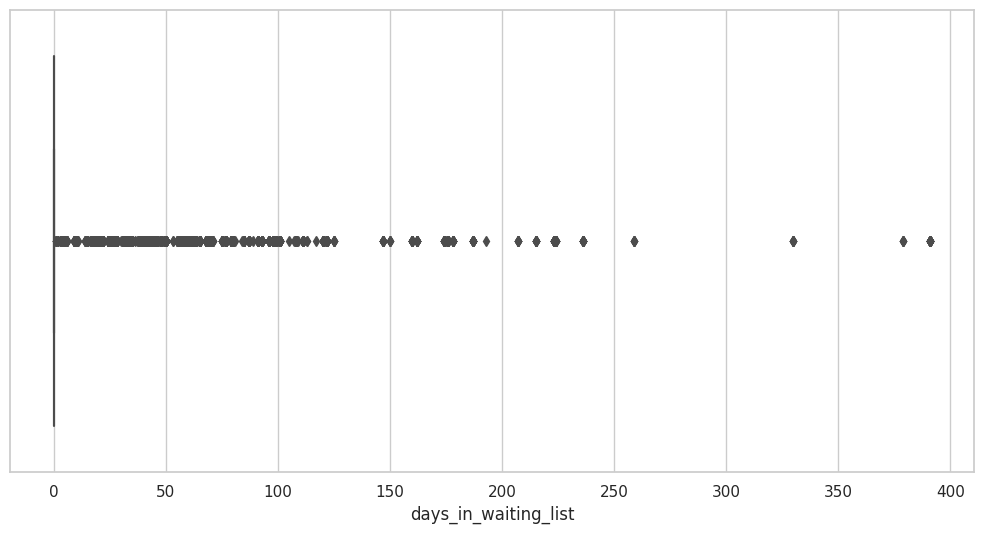

In [ ]:
sns.boxplot(x = ds_trabajo["days_in_waiting_list"])

Del gráfico, puedo considerar que un valor atípico es que, aproximadamente, una persona esté más de 300 dias en lista de espera. Puedo analizar los registros de las reservas en donde se esperó mas de 300 dias

In [ ]:
ds_trabajo[ds_trabajo["days_in_waiting_list"] > 300]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,id,is_canceled
518,City Hotel,443,2016,October,7,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,b3f440ab-7fff-4d40-9570-e5115f413986,1
4594,City Hotel,457,2016,October,21,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,106a6b7d-9dd7-4ae7-8a10-a5c9cd307d68,1
5507,City Hotel,457,2016,October,21,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,b5b86893-0a47-401c-8ac0-f1d0a240eb68,1
5583,City Hotel,457,2016,October,21,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,e059546a-c8ce-4bc1-9d86-adbd0f8bc9f7,1
6560,City Hotel,443,2016,October,7,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,78330898-079b-4ba4-bb32-9e6a7e1ce54e,1
6878,City Hotel,457,2016,October,21,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,4cbc2c71-7828-4352-95f4-9b1efefb62f3,1
9013,City Hotel,464,2016,October,28,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,7f5b1ddb-d34b-488b-90e1-4f83d3afbf03,1
10866,City Hotel,429,2016,September,23,0,2,2,0.0,0,...,B,0,No Deposit,1.0,330,Transient-Party,65.0,0,f00d632f-6751-4a27-a44a-76a85d9ee54f,0
12421,City Hotel,443,2016,October,7,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,5bd0aeb9-a418-4e90-800c-32b6875c65d9,1
13381,City Hotel,464,2016,October,28,0,2,2,0.0,0,...,A,0,Non Refund,1.0,391,Transient,65.0,0,26379c2d-d04f-4c3e-8979-19b1bff1f8ab,1


Y por lo que se ve, son 45 reservas, que no es una cantidad tan pequeña, y todas las reservas en que se esperó exactamente 391 dias fueron canceladas

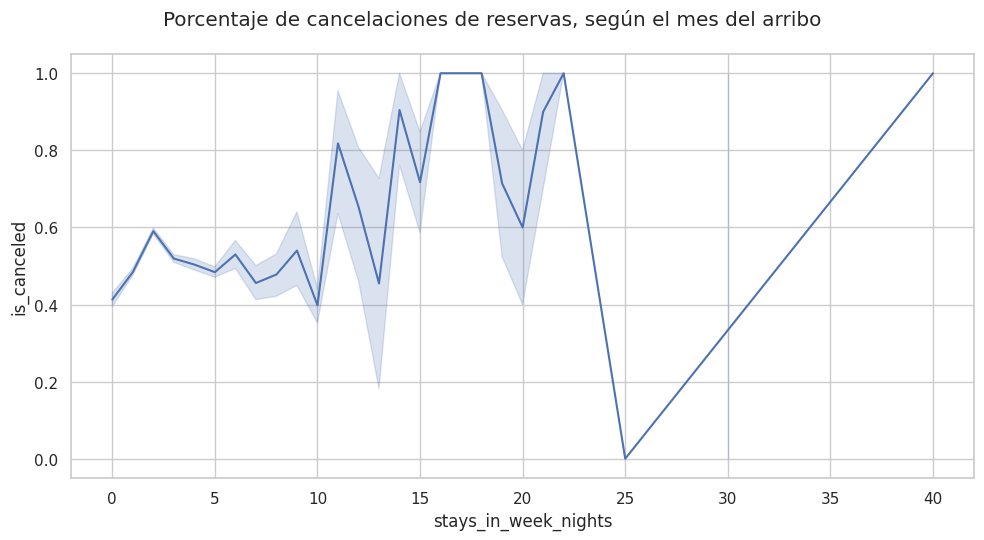

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,1)
fig.suptitle('Porcentaje de cancelaciones de reservas, según el mes del arribo')

fig = sns.lineplot(x=ds_trabajo['stays_in_week_nights'], y=ds_trabajo['is_canceled'], )
plt.sca(ax)